# HR Employee Attrition Data Analysis

In [153]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt


# Data Cleansing

In [154]:
#import data

df = pd.read_csv('HR-Employee-Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [155]:
#check for NA values

df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [156]:
#check for unique values

df.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

In [157]:
#check data types

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [158]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [159]:
#drop columns that are irrelevant to analysis

df.drop(['EmployeeCount','EmployeeNumber','StandardHours','Over18', 'StockOptionLevel'], axis=1, inplace=True)

In [160]:
#look at our numerical data

num = df.select_dtypes(exclude='object')
num.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,2,94,3,2,4,5993,...,11,3,1,8,0,1,6,4,0,5
1,49,279,8,1,3,61,2,2,2,5130,...,23,4,4,10,3,3,10,7,1,7
2,37,1373,2,2,4,92,2,1,3,2090,...,15,3,2,7,3,3,0,0,0,0
3,33,1392,3,4,4,56,3,1,3,2909,...,11,3,3,8,3,3,8,7,3,0
4,27,591,2,1,1,40,3,1,2,3468,...,12,3,4,6,3,3,2,2,2,2


In [161]:
#look at our non-numerical data

obj = df.select_dtypes(include='object')
obj.head()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,No


In [162]:
#print shape of our df, numerical data, non-numerical data

print(df.shape)
print(num.shape)
print(obj.shape)

(1470, 30)
(1470, 22)
(1470, 8)


<AxesSubplot:>

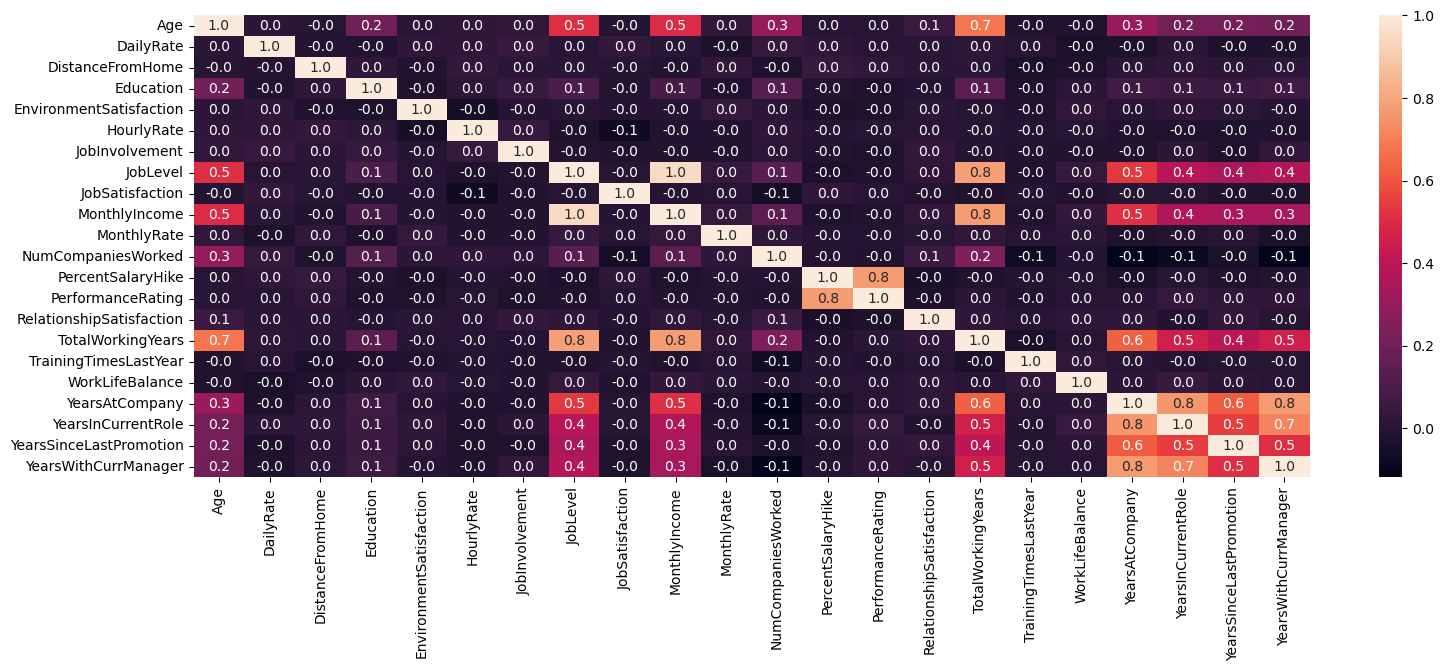

In [163]:
#correlation heatmap

corr= df.corr()
fig, ax = plt.subplots(figsize=(18, 6))
sns.heatmap(corr, annot=True, fmt='.1f')

In [164]:
# Calculate the IQR

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

print(IQR)

Age                            13.00
DailyRate                     692.00
DistanceFromHome               12.00
Education                       2.00
EnvironmentSatisfaction         2.00
HourlyRate                     35.75
JobInvolvement                  1.00
JobLevel                        2.00
JobSatisfaction                 2.00
MonthlyIncome                5468.00
MonthlyRate                 12414.50
NumCompaniesWorked              3.00
PercentSalaryHike               6.00
PerformanceRating               0.00
RelationshipSatisfaction        2.00
TotalWorkingYears               9.00
TrainingTimesLastYear           1.00
WorkLifeBalance                 1.00
YearsAtCompany                  6.00
YearsInCurrentRole              5.00
YearsSinceLastPromotion         3.00
YearsWithCurrManager            5.00
dtype: float64


In [168]:
#percent of data after removing outliers

Lower_Limit = Q1 - 1.5 * IQR
Upper_Limit = Q3 + 1.5 * IQR

Outliers = df[((df < Lower_Limit) | (df > Upper_Limit)).any(axis=1)]
num_outliers= len(Outliers.index)
total_rows= df.shape[0]
percent= ((total_rows-num_outliers)/total_rows *100)
print(percent)

56.4625850340136


/var/folders/sz/032pt4pd4sg7ytjsqfp987hr0000gp/T/ipykernel_47718/1272923999.py:6: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  Outliers = df[((df < Lower_Limit) | (df > Upper_Limit)).any(axis=1)]
/var/folders/sz/032pt4pd4sg7ytjsqfp987hr0000gp/T/ipykernel_47718/1272923999.py:6: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  Outliers = df[((df < Lower_Limit) | (df > Upper_Limit)).any(axis=1)]


(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22]),
 [Text(1, 0, 'Age'),
  Text(2, 0, 'DailyRate'),
  Text(3, 0, 'DistanceFromHome'),
  Text(4, 0, 'Education'),
  Text(5, 0, 'EnvironmentSatisfaction'),
  Text(6, 0, 'HourlyRate'),
  Text(7, 0, 'JobInvolvement'),
  Text(8, 0, 'JobLevel'),
  Text(9, 0, 'JobSatisfaction'),
  Text(10, 0, 'MonthlyIncome'),
  Text(11, 0, 'MonthlyRate'),
  Text(12, 0, 'NumCompaniesWorked'),
  Text(13, 0, 'PercentSalaryHike'),
  Text(14, 0, 'PerformanceRating'),
  Text(15, 0, 'RelationshipSatisfaction'),
  Text(16, 0, 'TotalWorkingYears'),
  Text(17, 0, 'TrainingTimesLastYear'),
  Text(18, 0, 'WorkLifeBalance'),
  Text(19, 0, 'YearsAtCompany'),
  Text(20, 0, 'YearsInCurrentRole'),
  Text(21, 0, 'YearsSinceLastPromotion'),
  Text(22, 0, 'YearsWithCurrManager')])

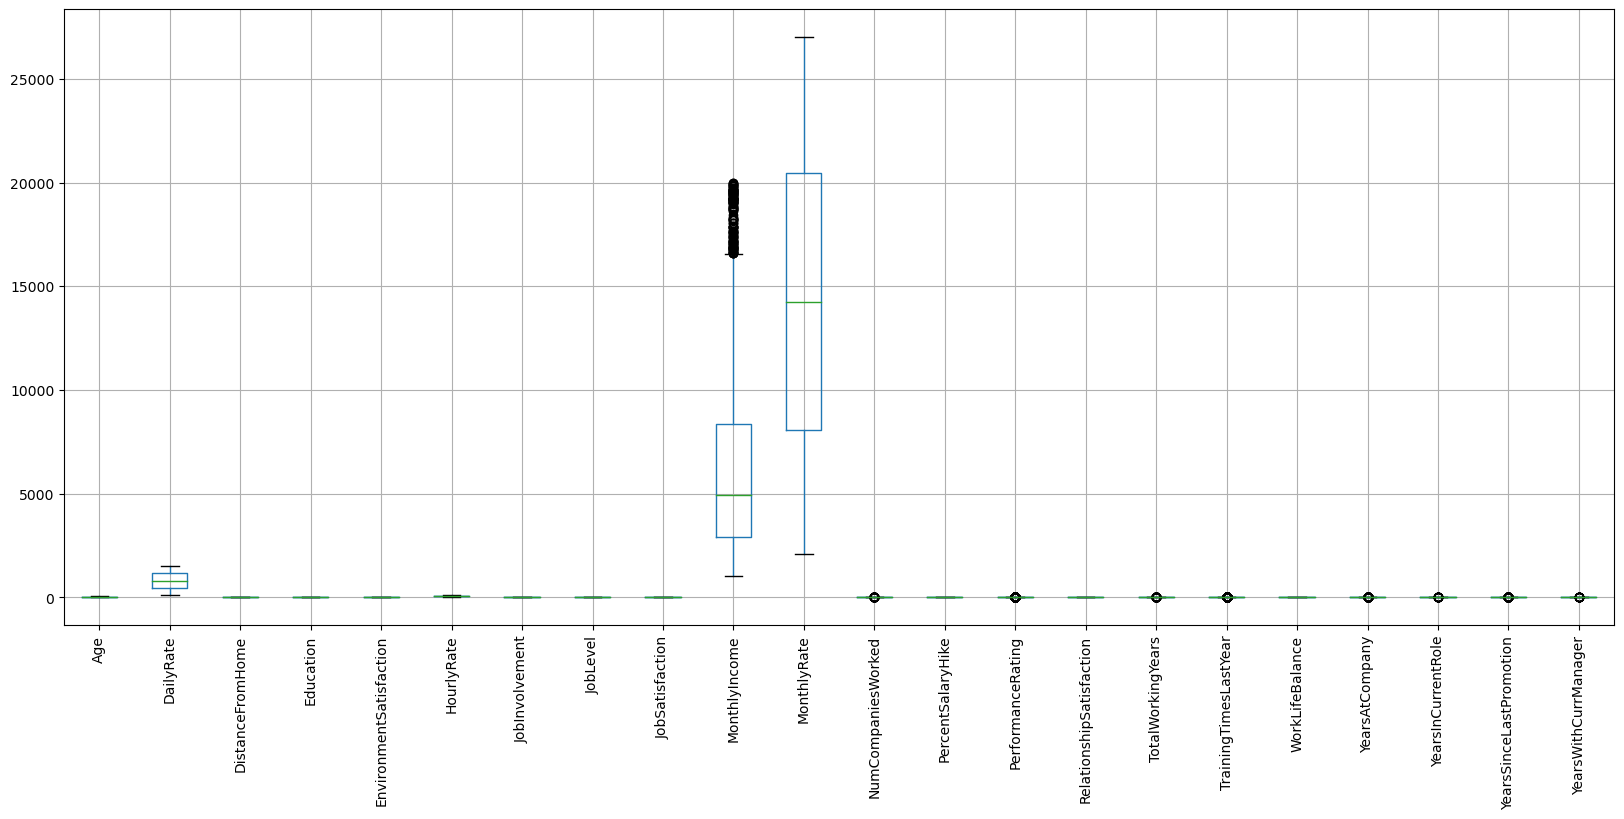

In [169]:
# Cheking for outliers

df.boxplot(figsize=(20,8))
plt.xticks(rotation=90)

<AxesSubplot:xlabel='Attrition', ylabel='count'>

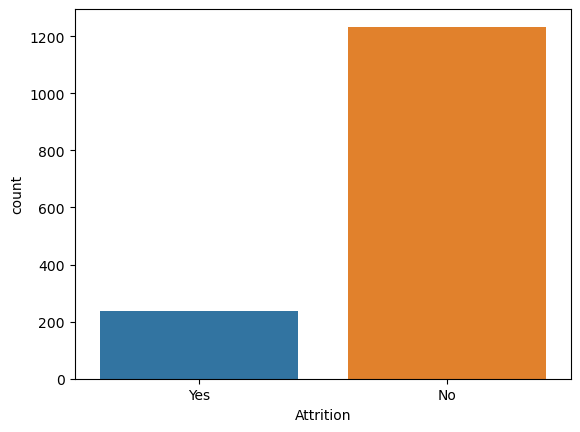

In [170]:
# Checking the distribution of the target variable

sns.countplot(x='Attrition', data=df)

/var/folders/sz/032pt4pd4sg7ytjsqfp987hr0000gp/T/ipykernel_47718/3885578975.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(i,figsize=(6,6))


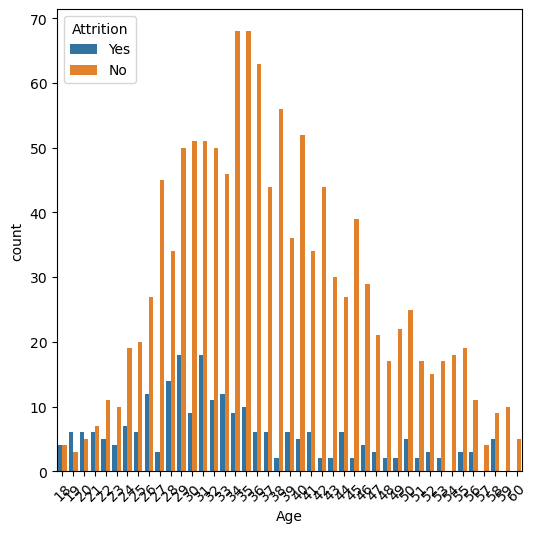

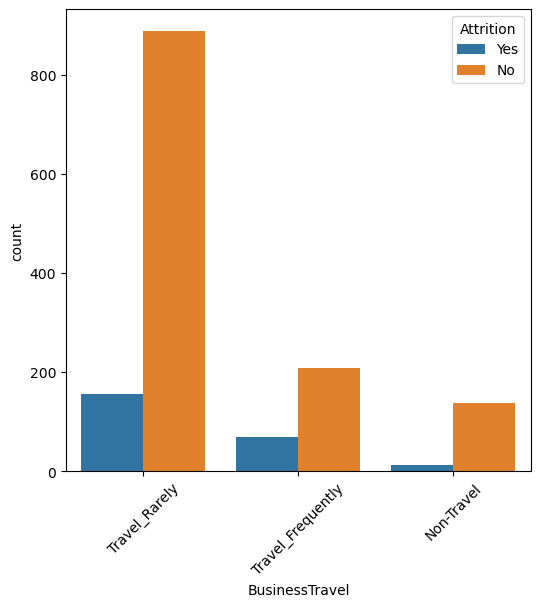

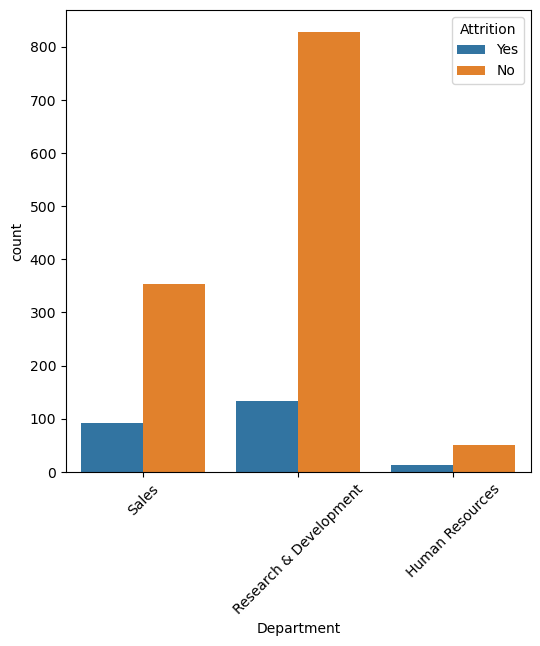

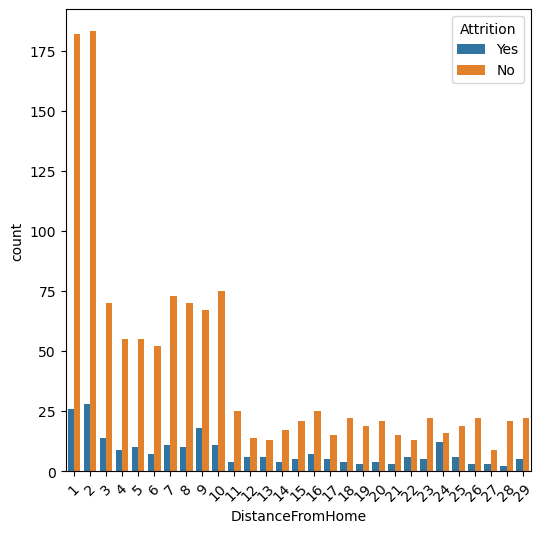

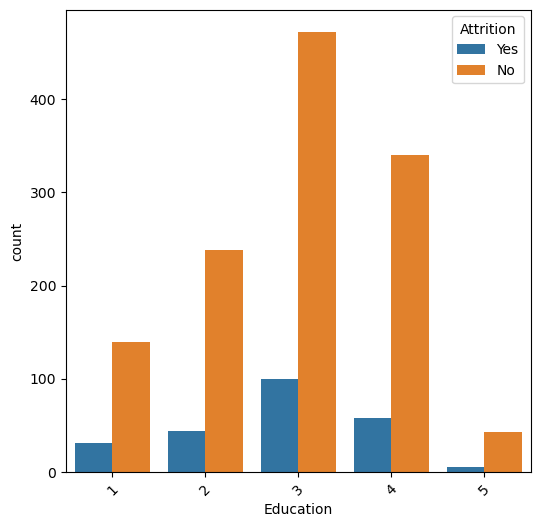

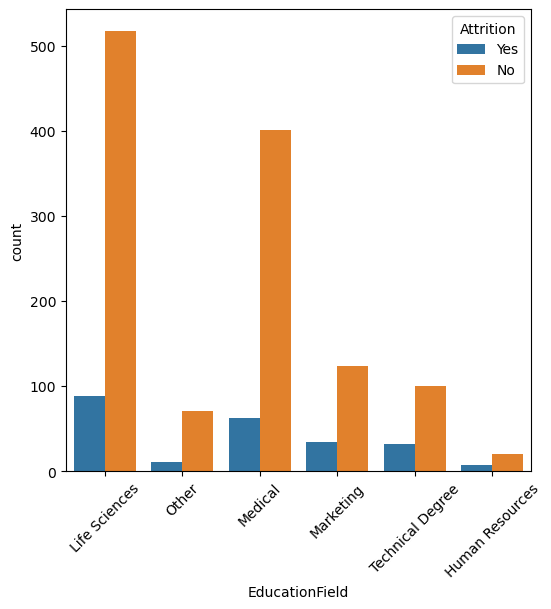

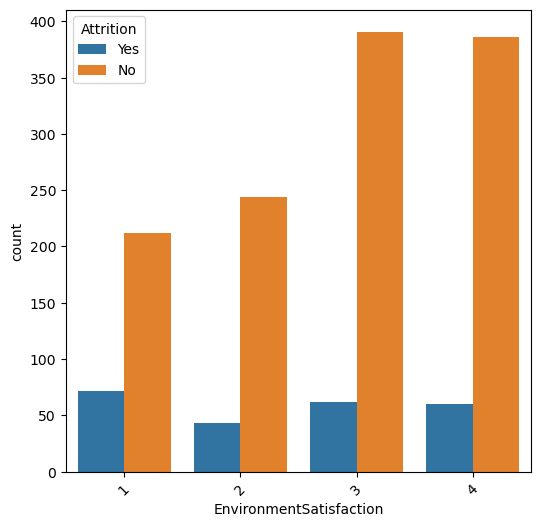

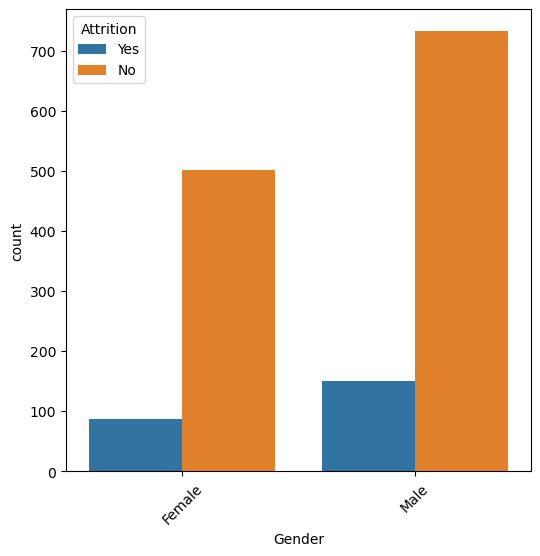

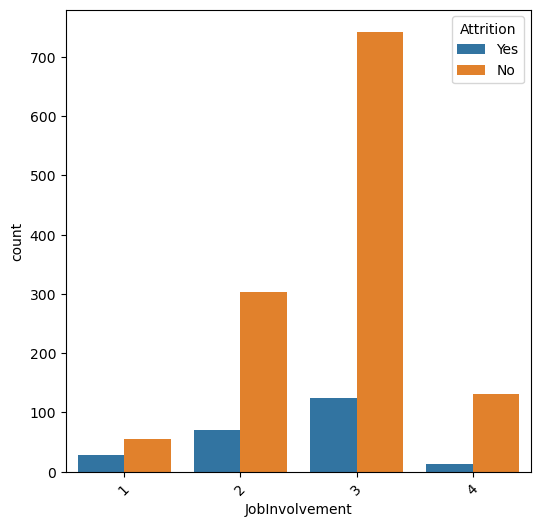

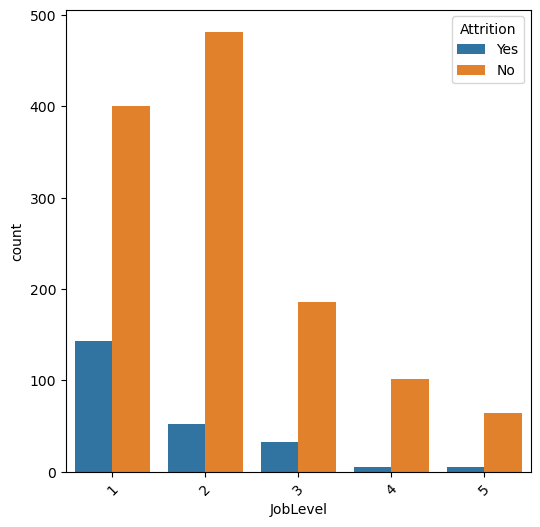

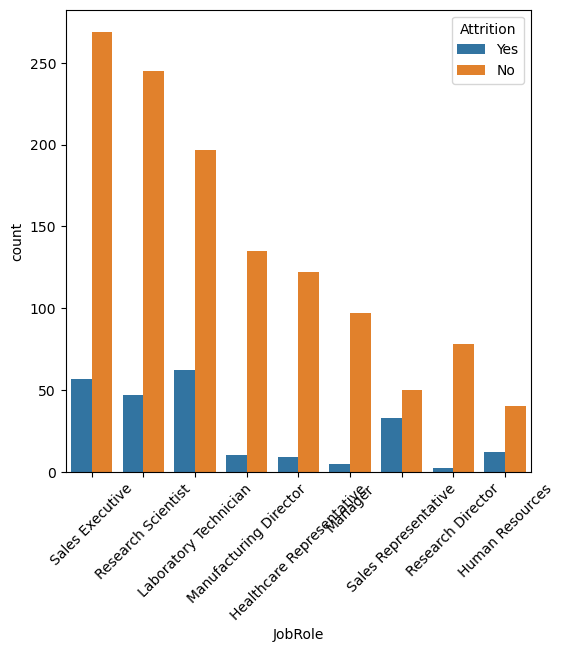

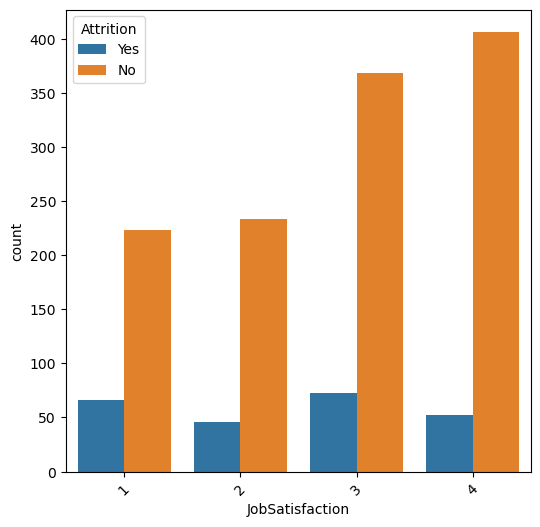

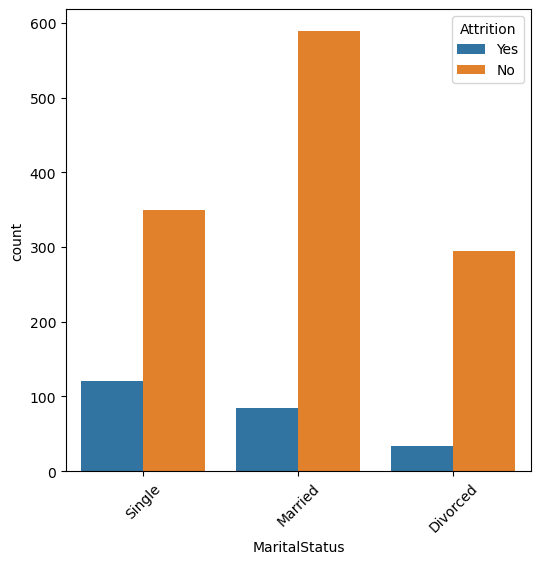

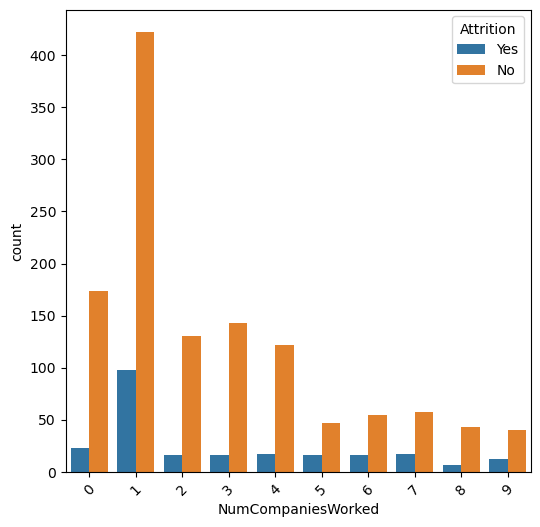

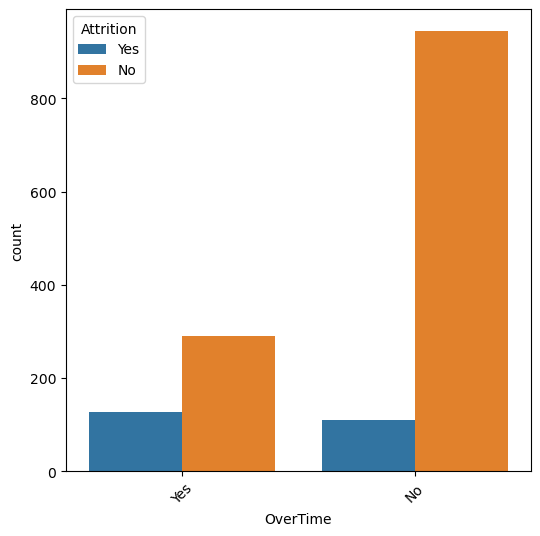

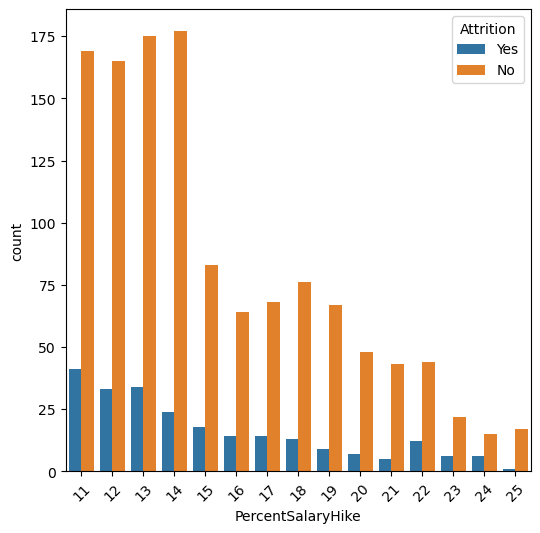

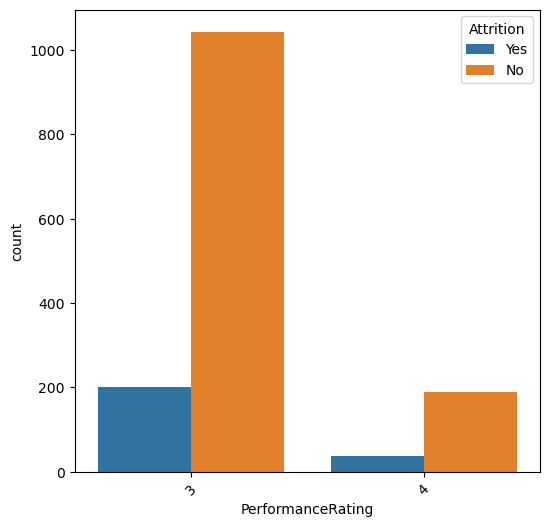

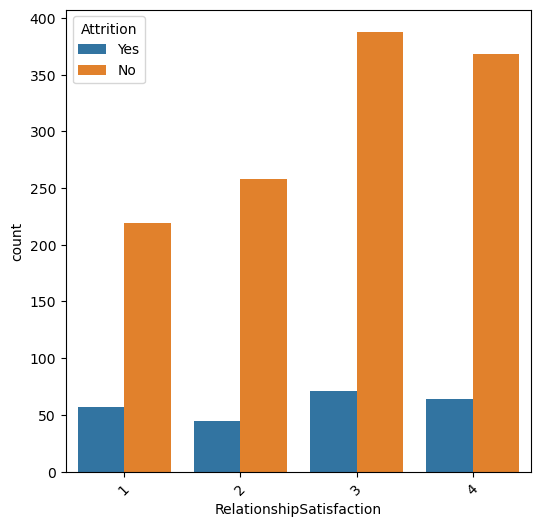

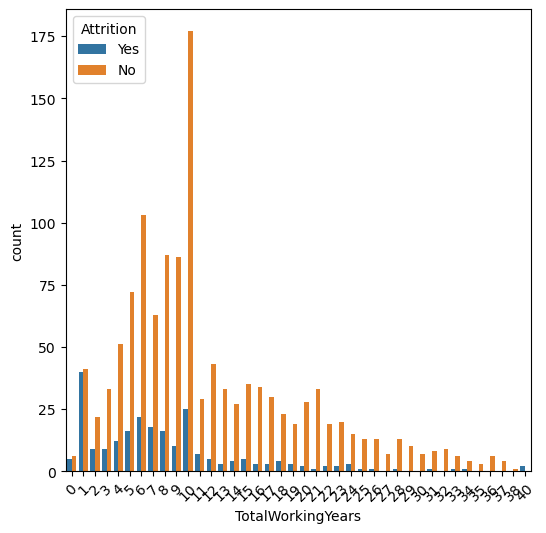

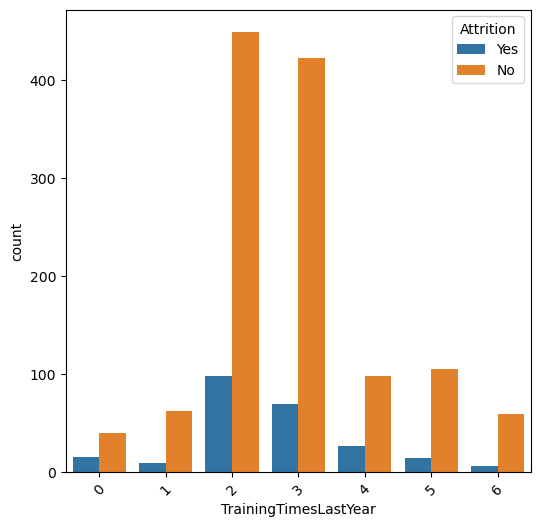

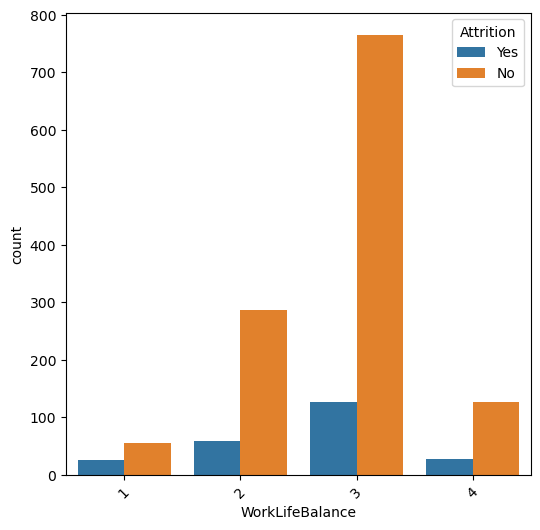

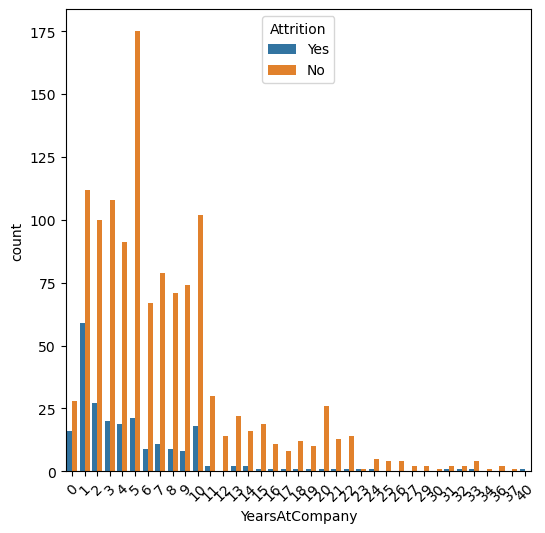

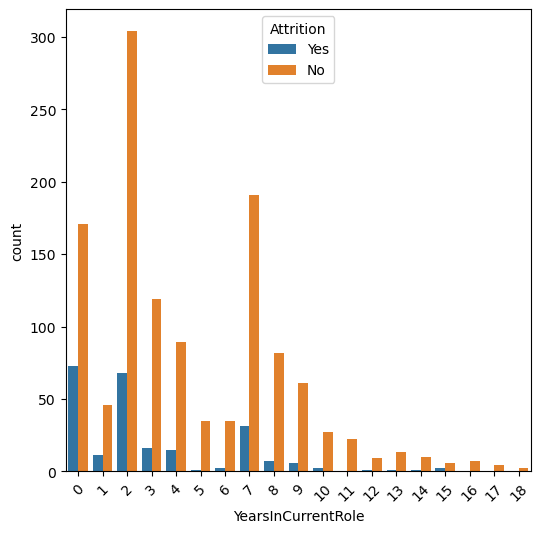

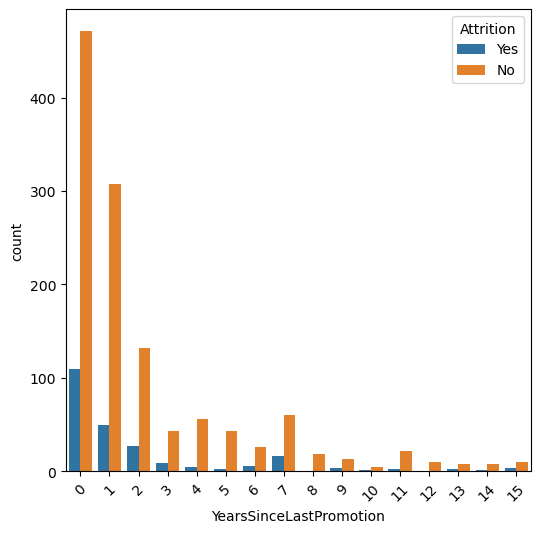

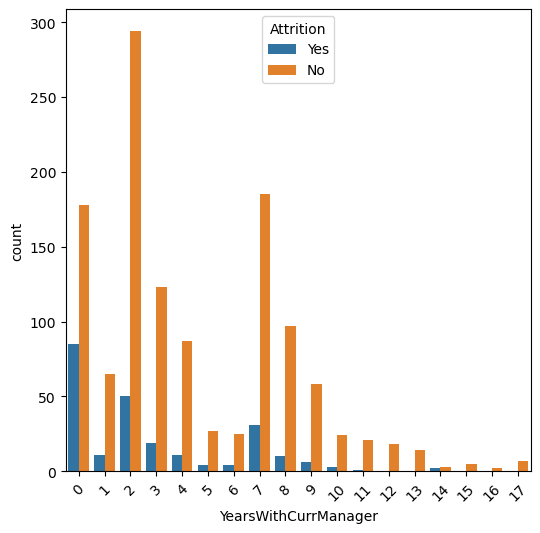

In [173]:
for i, p in enumerate(df.drop(columns=['Attrition','HourlyRate','MonthlyRate','MonthlyIncome','DailyRate'])):
    plt.figure(i,figsize=(6,6))
    sns.countplot(data=df,x=p,hue='Attrition')
    plt.xticks(rotation=45)

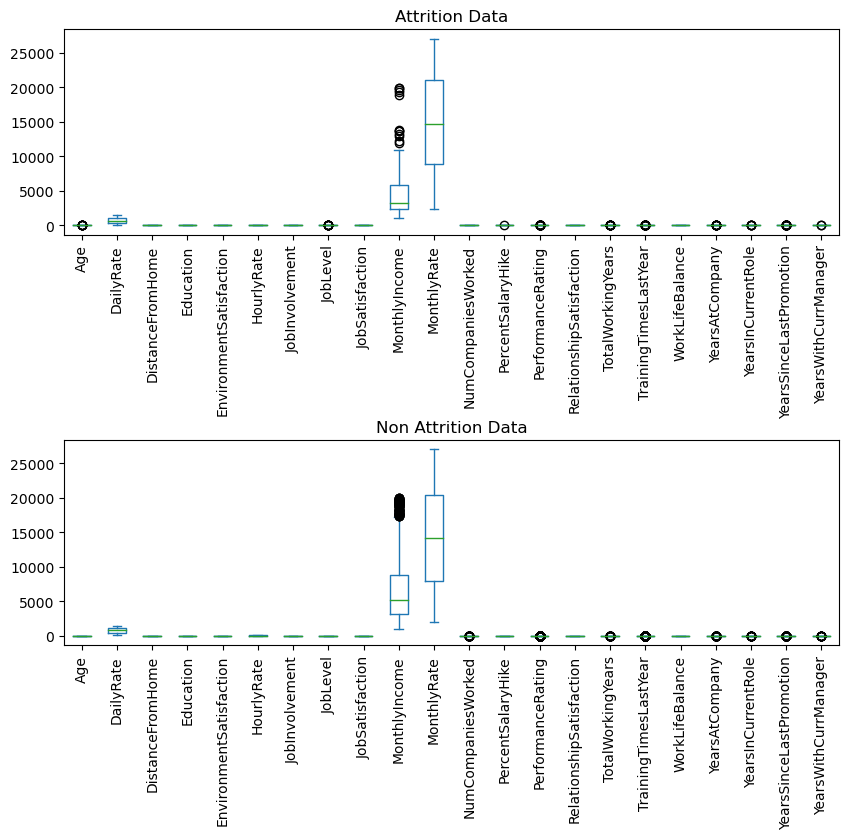

In [194]:
df_attrition = df[df["Attrition"] == 'Yes']
df_no_attrition = df[df["Attrition"] == 'No']

# Plot box plots for each subset
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10,8))
df_attrition.plot(ax=axes[0], kind="box", title="Attrition Data")
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)
df_no_attrition.plot(ax=axes[1], kind="box", title="Non Attrition Data")
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)


fig.subplots_adjust(hspace=1)

plt.show()